🧩 Cell 1 – Imports & Libraries 📦

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


⚙️ Cell 2 – Spark Session 🚀

In [0]:
spark = SparkSession.builder \
    .appName("Heart Failure Clinical Records Analysis") \
    .getOrCreate()


📥 Cell 3 – Load Data from Table 🗂️

In [0]:
df = spark.table("default.heart_failure_clinical_records_dataset")
df.show(5)


+----+-------+------------------------+--------+-----------------+-------------------+---------+----------------+------------+---+-------+----+-----------+
| age|anaemia|creatinine_phosphokinase|diabetes|ejection_fraction|high_blood_pressure|platelets|serum_creatinine|serum_sodium|sex|smoking|time|DEATH_EVENT|
+----+-------+------------------------+--------+-----------------+-------------------+---------+----------------+------------+---+-------+----+-----------+
|75.0|      0|                     582|       0|               20|                  1| 265000.0|             1.9|         130|  1|      0|   4|          1|
|55.0|      0|                    7861|       0|               38|                  0|263358.03|             1.1|         136|  1|      0|   6|          1|
|65.0|      0|                     146|       0|               20|                  0| 162000.0|             1.3|         129|  1|      1|   7|          1|
|50.0|      1|                     111|       0|               2

🧹 Cell 4 – Data Cleaning 🧼

In [0]:
df_cleaned = df.dropna().dropDuplicates()

print("Total Records:", df_cleaned.count())


Total Records: 299


📊 Cell 5 – Basic Aggregations (EDA with Spark) 🔍

In [0]:
df_cleaned.groupBy("DEATH_EVENT").count().show()

df_cleaned.groupBy("DEATH_EVENT").agg(
    avg("age").alias("avg_age"),
    avg("ejection_fraction").alias("avg_ejection_fraction"),
    avg("serum_creatinine").alias("avg_creatinine")
).show()

df_cleaned.groupBy("anaemia").count().show()
df_cleaned.groupBy("diabetes").count().show()
df_cleaned.groupBy("smoking").count().show()

+-----------+-----+
|DEATH_EVENT|count|
+-----------+-----+
|          1|   96|
|          0|  203|
+-----------+-----+

+-----------+-----------------+---------------------+------------------+
|DEATH_EVENT|          avg_age|avg_ejection_fraction|    avg_creatinine|
+-----------+-----------------+---------------------+------------------+
|          1|      65.21528125|             33.46875|1.8358333333333332|
|          0|58.76190640394089|    40.26600985221675| 1.184876847290641|
+-----------+-----------------+---------------------+------------------+

+-------+-----+
|anaemia|count|
+-------+-----+
|      0|  170|
|      1|  129|
+-------+-----+

+--------+-----+
|diabetes|count|
+--------+-----+
|       0|  174|
|       1|  125|
+--------+-----+

+-------+-----+
|smoking|count|
+-------+-----+
|      0|  203|
|      1|   96|
+-------+-----+



🔄 Cell 6 – Convert to Pandas 🐼

In [0]:
df_pd = df_cleaned.toPandas()

📈 Cell 7 – Correlation Heatmap 🔥

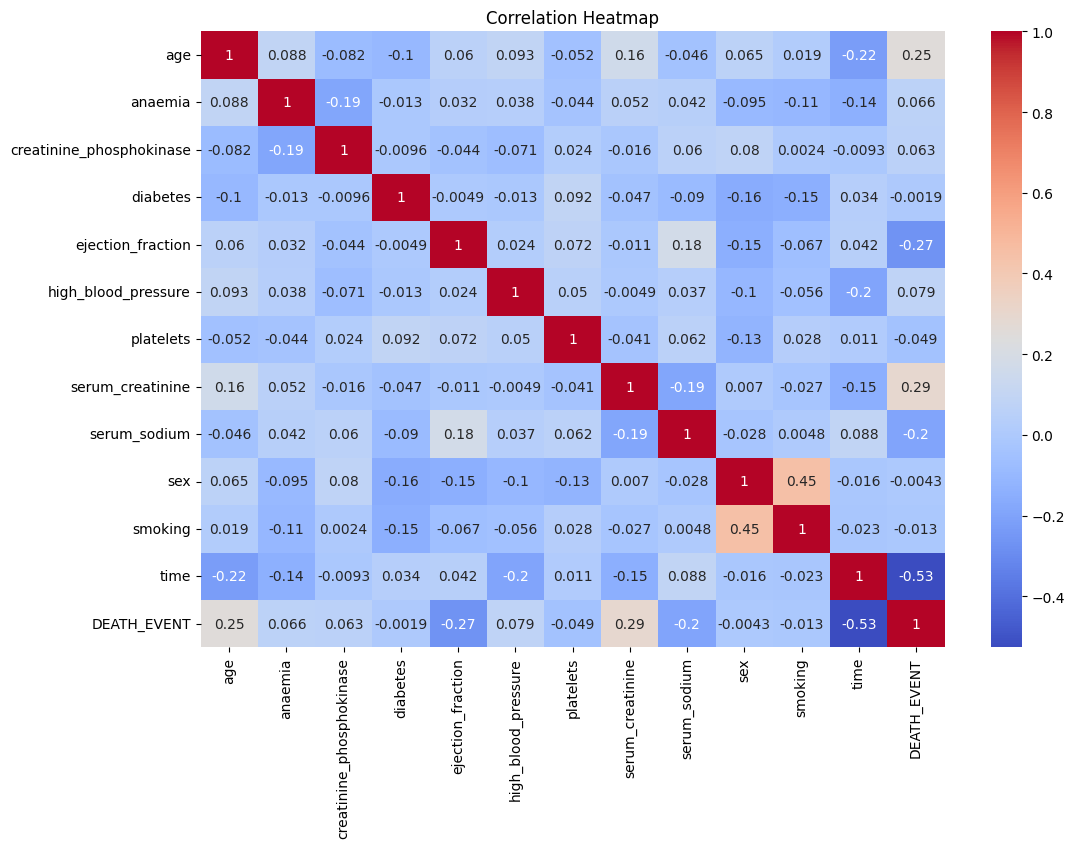

In [0]:
plt.figure(figsize=(12,8))
sns.heatmap(df_pd.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


📦 Cell 8 – Boxplot (Feature vs Target) 📊

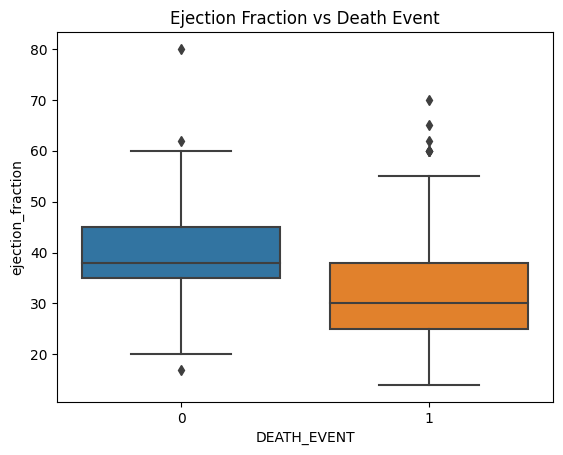

In [0]:
sns.boxplot(x="DEATH_EVENT", y="ejection_fraction", data=df_pd)
plt.title("Ejection Fraction vs Death Event")
plt.show()


📉 Cell 9 – Age Distribution 🎂

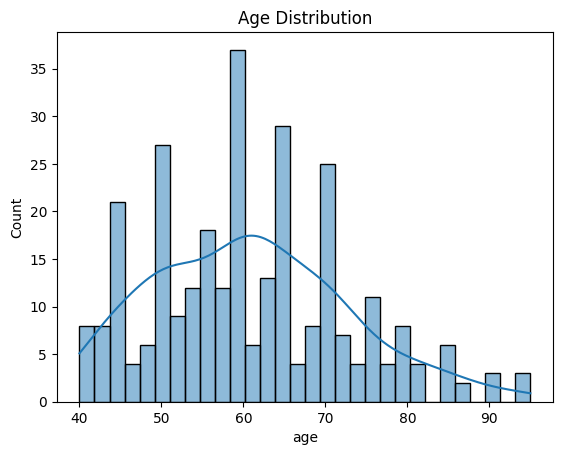

In [0]:
sns.histplot(df_pd["age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


🧠 Cell 10 – Feature Selection 🎯

In [0]:
features = [
    'age',
    'ejection_fraction',
    'serum_creatinine',
    'serum_sodium',
    'time'
]

target = 'DEATH_EVENT'

X = df_pd[features]
y = df_pd[target]


✂️ Cell 11 – Train / Test Split 🔀

In [0]:
SEED = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=SEED, stratify=y
)


🌳 Cell 12 – Random Forest Model 

In [0]:
rf_model = RandomForestClassifier(
    n_estimators=400,
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight="balanced",
    random_state=SEED
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=400, random_state=42)

📊 Cell 13 – Model Evaluation ✅

In [0]:
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8266666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87        51
           1       0.74      0.71      0.72        24

    accuracy                           0.83        75
   macro avg       0.80      0.80      0.80        75
weighted avg       0.82      0.83      0.83        75



🔍 Cell 14 – Confusion Matrix 🧩

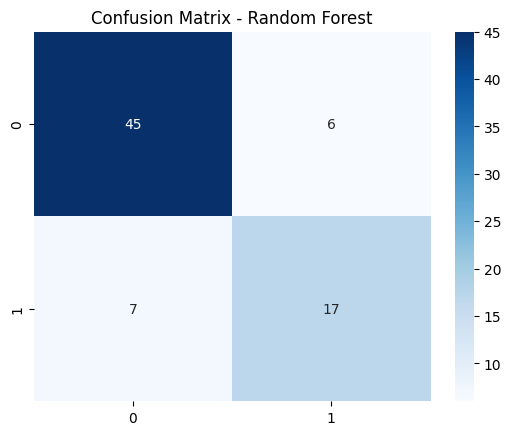

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt="d",
    cmap="Blues"
)

plt.title("Confusion Matrix - Random Forest")
plt.show()


🏁 Final Summary 🏆

✔️ Spark for scalable data processing
✔️ Pandas + Seaborn for EDA
✔️ XGBoost for high-performance ML
✔️ Fully compatible with Databricks Python + Compute